# PyTorch Computer vision

* See references

# Rescources

[Learnpytorch.io](https://www.learnpytorch.io/03_pytorch_computer_vision/)

[mrdbourke Git](https://github.com/mrdbourke/pytorch-deep-learning)


## 0. Computer vision libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for PuTorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a PyThon iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.0+cu121
0.20.0+cu121


# 1. Getting a dataset

The dataset we'll be using FashionMNIST from `torchvision.datasets`

In [2]:
# set up training data
train_data = datasets.FashionMNIST(
    root = "data", # Where to download data
    train = True, # if we want training data
    download = True, # we want to download
    transform = ToTensor(), # we want to convert them into tensors
    target_transform = None # if we want to change the target variables
)

test_data = datasets.FashionMNIST(
    root = "data", # Where to download data
    train = False, # if we want training data
    download = True, # we want to download
    transform = ToTensor(), # we want to convert them into tensors
    target_transform = None # if we want to change the target variables
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.84MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.6MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
# data is in format [C, H, W]
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


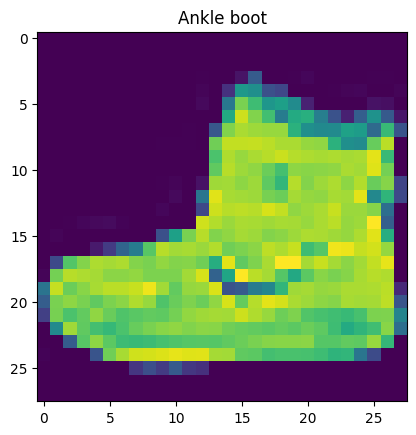

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.title(class_names[label])
plt.imshow(image.squeeze()) # squeeze will remove the extra dimension

(-0.5, 27.5, 27.5, -0.5)

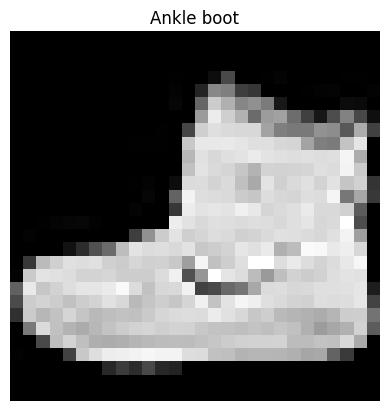

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

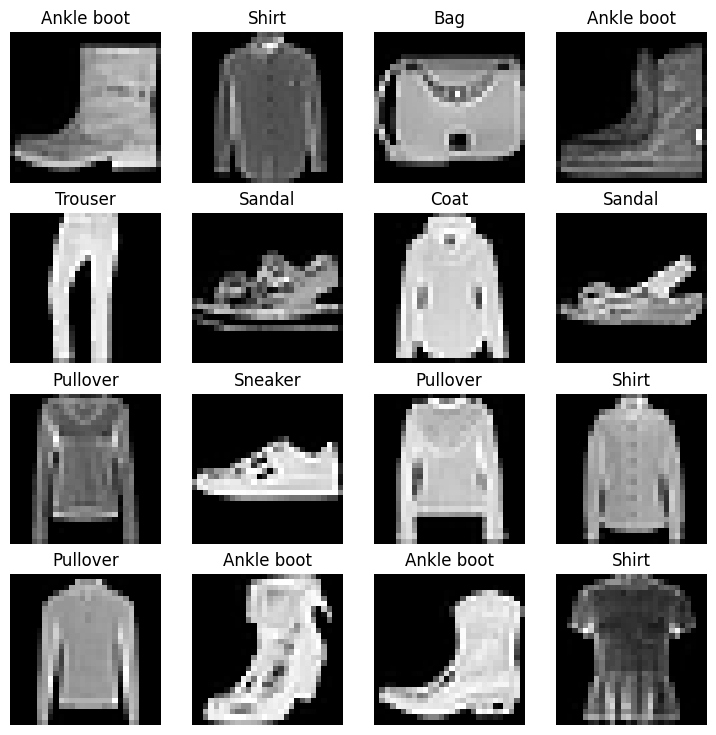

In [11]:
# Plot more iamges
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Do you think these items of clothing (images) could be modelled with lines? Or do you think we'll need non-lineaerities

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset in a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

Fore more on mini-batches, see here: https://www.youtube.com/watch?v=4qJaSmvhxi8&t=1s


In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False) # For testing purpose its better not to shuffle

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ebff0e01360>,
 <torch.utils.data.dataloader.DataLoader at 0x7ebff42b7130>)

In [14]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batchs of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batchs of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ebff0e01360>, <torch.utils.data.dataloader.DataLoader object at 0x7ebff42b7130>)
Lenght of train_dataloader: 1875 batchs of 32
Length of test_dataloader: 313 batchs of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


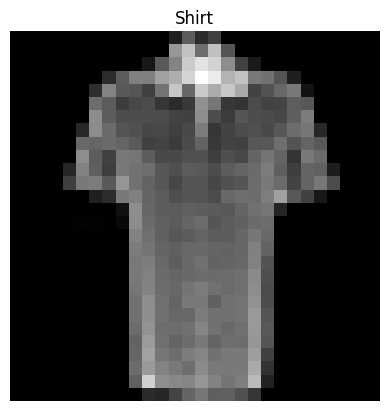

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 4. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple modle you will try and improve upon with subsequent models/experiments.

In other words: Start simply and add complexity when necessary.

In [17]:
# Creating a flatten layer
flatten_model = nn.Flatten()
# Ge a single sample
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color channel, height, weight]")
print(f"Shape after flattening: {output.shape} - > color channels, height*`weight")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channel, height, weight]
Shape after flattening: torch.Size([1, 784]) - > color channels, height*`weight


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = output_shape),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10, # How many units in the hidden layers
    output_shape = len(class_names) # one for evey class
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss and optimizer, model evaluation metrics
* Loss function - Since we'are working with multi-class data, our loss will be `nn.CrossEntropyLoss()`
* Optimizer - out optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metrics -


In [22]:
# Calculate accuracy (a classification metric)
# def accuracy_fn(y_true, y_pred):
#     correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
#     acc = (correct / len(y_pred)) * 100
#     return acc

In [23]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("Helper_functions.py already exists, skipping downlaod")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


In [24]:
# Import Accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etec)
2. How fast it runs

In [25]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time.
  args:
    start = start time of the execution
    end = end time of the execution
    device: which device the code is running, the default is None
  returns:
    total execution time
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [26]:
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = "cpu")

Train time on cpu:  0.000 seconds


5.062999997562656e-05

### 3.3 Creating a training loop and training a model on batches of data..

1. Loop through epochs.
2. Loop through training batchs, perform training steps, calculate train loss *per batch*.
3. Loop through testing batching, perform testing steps, calculate the test loss *per batch*
4. Print out wha'ts happening.
5. time it all (for fun).

In [27]:
# Import dqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n----")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # 3. Optimizer zerograd
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. optimizer step
    optimizer.step()
    # Print out how many samples have been seen
    if not batch % 400:
      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  # Divide total train loss by length of train dataloader (average loss per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  # Seup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X)
      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y)
      # 3. Calculate accuracy (preds need to be same as y_true)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)
    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_trian_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test Acc: 82.04%

Epochs: 1
----
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test Acc: 83.20%

Epochs: 2
----
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test Acc: 83.43%

Train time on cpu:  29.470 seconds


In [28]:
next(model_0.parameters()).device

device(type='cpu')

# 4 Make predictions and get Model 0 results

In [29]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn, device = device):
  """Returns a dictionary containing the results of model predicting on data_loaders."""
  loss, acc = 0, 0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1)) # Skiping the softmax because argmax will return the maximum index
    # Scale loss and acc to find the average loss / acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when mdoel was created with class,
          "model_loss": loss.item(),# item will turn it into single values
          "model_acc": acc}
model_0_results = eval_model(model = model_0,
                            data_loader=test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [31]:
!nvidia-smi # to check is gpu is available

Thu Nov 14 12:37:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              27W /  70W |    151MiB / 15360MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
torch.cuda.is_available()

True

## 6 Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in Notebook02

In [33]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Calculates the training computation of a PyTorch model
  Arge:
    model: A pytorch class for model
    data_loader: The dataloader of pytorch
    loss_fn: Loss function for the model
    optimzer: optimizer of the loss
    accuracy_fn: Accuracy function for calculation
    devic: Device agnostic code cuda or cpu
  """
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc = accuracy_fn(y_true = y, y_pred =y_pred.argmax(dim = 1))
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer.step()
  # Calculate the loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Calculates the training computation of a PyTorch model
  Arge:
    model: A pytorch class for model
    data_loader: The dataloader of pytorch
    loss_fn: Loss function for the model
    optimzer: optimizer of the loss
    accuracy_fn: Accuracy function for calculation
    devic: Device agnostic code cuda or cpu
  """
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. forward pass
      test_pred = model(X)
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1)) # Go from logitrs -> pred labels
    # Adjust metrics and print out what's happening
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

In [34]:
# Create a mdel with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [35]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)


next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n...")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)

  test_step(data_loader = test_dataloader,
            model = model_1,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)

train_timme_end_gpu = timer()

total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_timme_end_gpu,
                                            device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
...
Train loss: 1.09199 | Train accuracy: 0.03%
Test loss: 0.00219 | Test Accuracy: 65.00%
Epoch: 1
...
Train loss: 0.78101 | Train accuracy: 0.03%
Test loss: 0.00127 | Test Accuracy: 73.91%
Epoch: 2
...
Train loss: 0.67027 | Train accuracy: 0.04%
Test loss: 0.00127 | Test Accuracy: 75.02%
Train time on cuda:  32.772 seconds


In [38]:
# Get Model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are know for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see websit: https://poloclub.github.io/cnn-explainer/

In [39]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1, # values we can set ourselvs in our NN's are called hperparameters
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, # there's a trick to calculating this... print this and multiplty it
                  out_features = output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    return x

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, # color channel
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

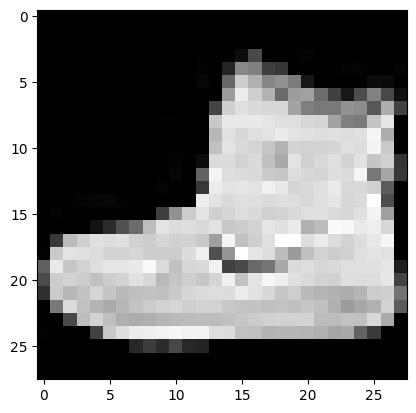

In [41]:
plt.imshow(image.squeeze(), cmap = "gray")

### Determining the shape of the output

In [42]:
# Pass image through the model
rand_image_tensor = torch.randn(size = (1, 28, 28))
# rand_image_tensor
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through Conv2d

In [43]:
# model_2.state_dict()

In [44]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size = (32, 3, 64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [45]:
# Create a single cov2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3, # (3,3) and 3 are same
                       stride = 1,
                       padding = 1)

# Pass the data thorugh the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0)) # will throw error to expect 4 dim use unsqueeze(0) to add extra dimension

In [46]:
conv_output

tensor([[[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
           -3.1604e-01,  4.5352e-01],
          [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
           -2.3216e-01,  7.7080e-01],
          [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
           -5.7622e-01,  4.2301e-01],
          ...,
          [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
            3.5645e-01,  2.8384e-01],
          [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
           -7.2258e-01, -8.3858e-02],
          [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
            3.2819e-01,  3.6604e-01]],

         [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
           -7.5413e-01,  4.0612e-01],
          [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
            2.5263e-01,  3.8844e-01],
          [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
            8.4869e-01, -1.5706e-01],
          ...,
     

In [47]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensios to our images
random_tensor = torch.randn(size = (1,1,2,2))
print(f"\nRandom Tensor:\n{random_tensor}")
print(f"Random tensor:\n{random_tensor.shape}")

# Print out original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test iamge with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"Shape after going though conv_layer(): {test_image_through_conv.shape}")

# Pass data though the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(random_tensor)
print(f"nMax pool tensor:\n{test_image_through_conv_and_max_pool}")
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Random Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor:
torch.Size([1, 1, 2, 2])
Test image original shape: torch.Size([3, 64, 64])
Test iamge with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going though conv_layer(): torch.Size([1, 10, 64, 64])
nMax pool tensor:
tensor([[[[0.3367]]]])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 1, 1, 1])


In [48]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tesor = torch.randn(size = [1,1,2,2])

# Create a max pool layer
max_ppol_layer = nn.MaxPool2d(kernel_size = 2)
# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tesor)
print(f"\nMax pool tensor:\n {max_pool_tensor.shape}")


Max pool tensor:
 torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2()`

In [49]:
# Setup loss/function/eval metrics/optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [50]:
### 7.4 Trainig and testing `model_2` using our training and testing

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  # Training Step
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  # Testing Step
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device =device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.03789 | Train accuracy: 0.04%
Test loss: 0.00109 | Test Accuracy: 76.87%
Epoch: 1
-----
Train loss: 0.54953 | Train accuracy: 0.04%
Test loss: 0.00074 | Test Accuracy: 81.46%
Epoch: 2
-----
Train loss: 0.45557 | Train accuracy: 0.05%
Test loss: 0.00081 | Test Accuracy: 84.26%
Epoch: 3
-----
Train loss: 0.41305 | Train accuracy: 0.05%
Test loss: 0.00075 | Test Accuracy: 85.44%
Epoch: 4
-----
Train loss: 0.38642 | Train accuracy: 0.04%
Test loss: 0.00110 | Test Accuracy: 85.95%
Train time on cuda:  64.578 seconds


In [52]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.39875680208206177,
 'model_acc': 85.95247603833866}

# 8. Compare Models

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.398757,85.952476


In [54]:
compare_results["training_time"] = [total_trian_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [55]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,29.470331
1,FashionMNISTModelV1,0.685001,75.019968,32.771860
2,FashionMNISTModelV2,0.398757,85.952476,64.577863


Text(0, 0.5, 'model')

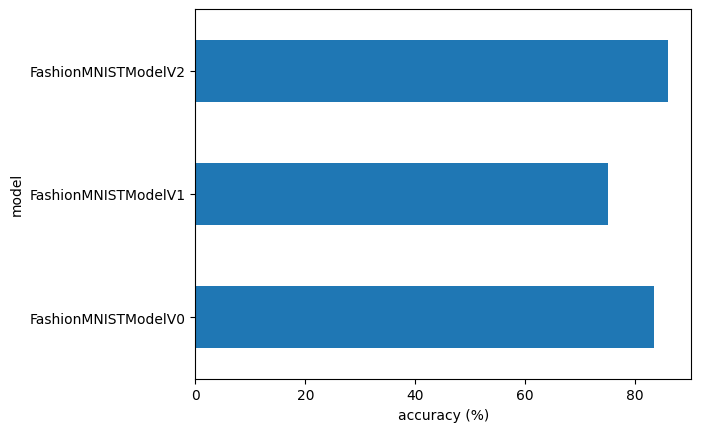

In [56]:
# Visualize our Model
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [57]:
# 9. Make and evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      # forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0) # squeeze to remove extra dimension
      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stach the pred_prob to turn list into a tensor
  return torch.stack(pred_probs)

In [58]:
import random
random.seed(84)
test_sample = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_sample.append(sample)
  test_labels.append(label)

  # View the first sample shape
  test_sample[0].shape

Text(0.5, 1.0, 'Coat')

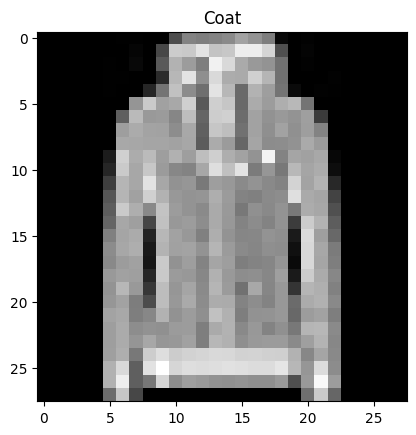

In [59]:
plt.imshow(test_sample[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [60]:
# Make Predictions
pred_probs = make_predictions(model = model_2,
                              data = test_sample, device = device)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.1004e-02, 9.4212e-04, 6.9929e-01, 1.0082e-02, 2.4782e-01, 2.2993e-08,
         2.9269e-02, 1.2532e-08, 1.5879e-03, 7.2346e-08],
        [2.0707e-05, 1.9954e-05, 6.6163e-05, 4.5911e-05, 2.2423e-06, 8.5423e-02,
         3.2499e-05, 9.0767e-01, 6.5731e-03, 1.4269e-04]])

In [61]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([2, 7, 5, 0, 8, 1, 0, 8, 8])

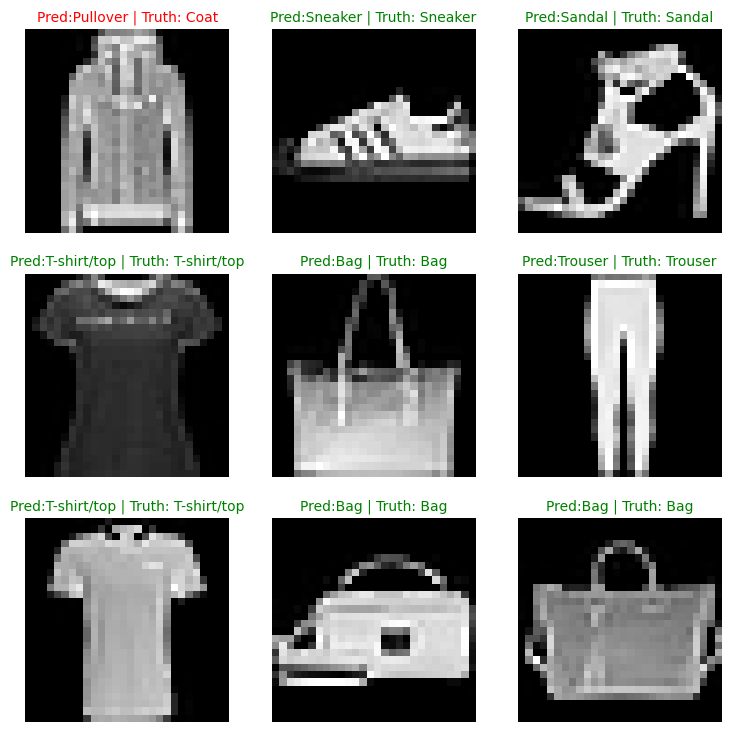

In [62]:
# Plot predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create subplot
  plt.subplot(nrows, ncols, i+ 1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")
  # Find the prediction (in text form, e.g., 'sandal')
  pred_label = class_names[pred_classes[i]]
  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred:{pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

# 10. Make Confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification model visually:

Learnpytorch.io: https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation

Torchmetrics: https://lightning.ai/docs/torchmetrics/stable/

1. Make prediction with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_consufion_matrix()`

In [63]:
import mlxtend
mlxtend.__version__

'0.23.2'

In [64]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn prediction from logits-> predictions probs-> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concantenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
len(y_pred_tensor)

10000

In [66]:
# See if required packages are installed and if not, intall them..
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] )>= 19, "Mlxtend version should be 0.19.0 or higher"
except:
  ! pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 47.8 MB/s eta 0:00:00
mlxtend version: 0.23.2


In [67]:
# assert int(mlxtend.__version__.split(".")[1] )>= 30, "Mlxtend version should be 0.19.0 or higher"

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

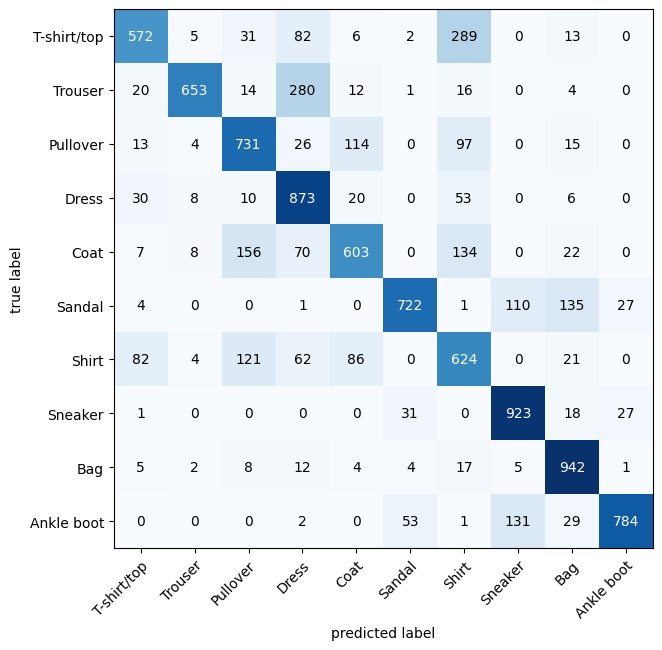

In [69]:
# 2. Set up Consufion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
conftmat_tensor = confmat(preds = y_pred_tensor,
                          target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = conftmat_tensor.numpy(), # matplotlib works with numpy
    class_names = class_names,
    figsize = (10,7)
)

# 11. Save and Load best performing model

In [70]:
from pathlib import PurePath
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Crate model save path
MODEL_NAME = "03_computervisionmodel_2.pth" # torch file ends with .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)

Saving model to : models/03_computervisionmodel_2.pth


## Saving the model in google drive3

In [71]:
from google.colab import drive
drive.mount('/content/drive')
# 2. Create folder
import os
!mkdir - p "/content/drive/My Drive/PyTorch_Models"
# Write the models dict
google_path = "/content/drive/My Drive/PyTorch_Models/03_computervisionmodel_2.pth"

torch.save(obj = model_2.state_dict(), f = google_path)

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/PyTorch_Models’: File exists


In [73]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units=10,
                                     output_shape = len(class_names))
# Load in the save state dict
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

<ipython-input-73-e31b8fbbb39d>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [75]:
print(model_2_results)
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader= test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
print(loaded_model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.39875680208206177, 'model_acc': 85.95247603833866}


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.39875680208206177, 'model_acc': 85.95247603833866}


In [77]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-08) # atol is tollerance

tensor(True)

In [78]:
# Do the exercise to